In [66]:
import nltk
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
from nltk.corpus import wordnet
from nltk.corpus import words
import pandas as pd
import numpy as np
from nltk import sent_tokenize

# Creating offline data

In [67]:
d = {}
links = ["https://sportsadvice.decathlon.in/advice-alias/feminine-hygiene-hike-tp_9223","https://sportsadvice.decathlon.in/advice-alias/how-choose-waterproof-hiking-jacket-tp_6800","https://sportsadvice.decathlon.in/advice-alias/do-you-know-7-leave-no-trace-principles-tp_9251","https://sportsadvice.decathlon.in/advice-alias/aquaphobia-lets-talk-about-it-tp_1919","https://sportsadvice.decathlon.in/advice-alias/aqua-sports-are-growing-popularity-tp_4027","https://sportsadvice.decathlon.in/advice-alias/5-basics-sharing-swimming-pool-tp_3274"]
for url in links:
    html = urlopen(url).read()
    cleantext = BeautifulSoup(html, "lxml").text
    d[f'{url}'] = cleantext

In [68]:
df = pd.DataFrame(list(d.items()), columns=['Link','Text'])

In [69]:
df.to_excel('data.xlsx')

# Remove Special Characters

In [70]:
df = pd.read_excel('data.xlsx')
df.head()

,Link,Text
0,https://sportsadvice.decathlon.in/advice-alias...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ndataLa...
1,https://sportsadvice.decathlon.in/advice-alias...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ndataLa...
2,https://sportsadvice.decathlon.in/advice-alias...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ndataLa...
3,https://sportsadvice.decathlon.in/advice-alias...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ndataLa...
4,https://sportsadvice.decathlon.in/advice-alias...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ndataLa...


In [71]:
cleantext = []
for i in range(len(df)):
    cleantext.append(df.Text.loc[i])

In [72]:
dt = []
for c in cleantext:
    zzz = re.sub('[^A-Za-z0-9]+', ' ', c)
    dt.append(zzz.split())

# Remove words with length less than 4

In [73]:
def _remove_smallW(str_list):
    dt = []
    for w in str_list:
        if(len(w)>3):
            dt.append(w)
    return dt
ddt = _remove_smallW(dt)

In [74]:
# # Lemmatizer
# def _list_lemmatizer(cl_list):
#     lemmatizer = nltk.WordNetLemmatizer()
#     new_list = []
#     for le in cl_list:
#         new_list.append(lemmatizer.lemmatize(le))
#     return new_list

# # Stemmer
# def _list_stemmer(st3):
#     stemmer = nltk.stem.PorterStemmer()
#     new_list = []
#     for le in st3:
#         new_list.append(stemmer.stem(le))
#     return new_list

# Creating a Vocabulary

In [75]:
from nltk.corpus import stopwords
stw = stopwords.words()

In [76]:
dpt = []
for ww in ddt:
    for w in ww:
        if w.lower() not in stw:
            dpt.append(w.lower())

In [77]:
dpt = list(set(dpt))
len(dpt)

1459

# Filtering Vocabulary

In [78]:
def _nonEng(dpt):
    dl = words.words()
    cl_list = []; rej_list = []
    for w in dpt:
        if(w in dl):
            cl_list.append(w)
        else:
            rej_list.append(w)
    return cl_list, rej_list

In [79]:
dkt, b = _nonEng(dpt)

In [80]:
# lem_l = _list_lemmatizer(dkt)
# stem_l = _list_stemmer(lem_l)

In [81]:
# preVoc = list(set(stem_l))
# len(preVoc)

# TfIdf Vectorizer: Providing it the custom vocabulary

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tf = TfidfVectorizer(vocabulary=dkt)

In [84]:
# def _frame_lemmatizer(df):
#     lemmatizer = nltk.WordNetLemmatizer()
#     zzz = lemmatizer.lemmatize(df['Text'])
#     return zzz
# def _frame_stemmer(df):
#     stemmer = nltk.stem.PorterStemmer()
#     zzz = stemmer.stem(df['Text'])
#     return zzz

In [85]:
# for i in range(len(df)):
#     m = _clean_all(df.Text.loc[i])
#     df.Text.at[i] = m
# df['Text'] = df.apply(_frame_lemmatizer,axis=1)
# df['Text'] = df.apply(_frame_stemmer,axis=1)

# Transforming Documents into Tf-Idf matrix

In [86]:
tfidf_mat = tf.fit_transform(cleantext)

In [87]:
tfidf_mat.shape

(6, 977)

# Latent Dirichlet Allocation 
<b>keep commented

In [88]:
# from sklearn.decomposition import LatentDirichletAllocation 

In [89]:
# lda = LatentDirichletAllocation(n_components=10, max_iter=500,
#                                 learning_method='online',
#                                 learning_offset=50.,
#                                 random_state=0)

In [90]:
# a = lda.fit_transform(tfidf_mat)

In [91]:
# topic_words = {}
# n_top_words = 10; vocab = dkt
# for topic, comp in enumerate(lda.components_):
#     word_idx = np.argsort(comp)[::-1][:n_top_words]
#     # store the words most relevant to the topic
#     topic_words[topic] = [vocab[i] for i in word_idx]

In [92]:
# lda.transform(tf.transform([df.Text.loc[1]]))

In [93]:
# for topic, words in topic_words.items():
#     print('Topic: %d' % topic)
#     print('  %s' % ', '.join(words))

# Get Tags for respective documents
<br/>
Input: 1. Tf-Idf of documents, 2. Specific document, 3. Number of Tags

In [118]:
def _give_tags(tfidf_mat,doc,num_tags):
    feature_index = tfidf_mat[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_mat[doc, x] for x in feature_index])
    
    scr = {}
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        scr[f'{w}'] =  s
    
    ddf = pd.DataFrame(list(scr.items()), columns=['Tag','Score'])
    ddff = ddf.sort_values('Score',ascending=False)
    ddff = ddff.reset_index(drop=True)
    
    return ddff.Tag.loc[:num_tags-1]

In [119]:
_give_tags(tfidf_mat,doc,3)

0       hike
1     advice
2    hygiene
Name: Tag, dtype: object

# Visualizing Documents
<br/>
The documents have been visualized using a Singular Value Decomposition technique, which utilizes the current data and transforms it, representing the document in a 2D plot

In [40]:
from sklearn.decomposition import TruncatedSVD

In [44]:
svd = TruncatedSVD(n_components=2, random_state=42)
data = svd.fit_transform(tfidf_mat) 

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

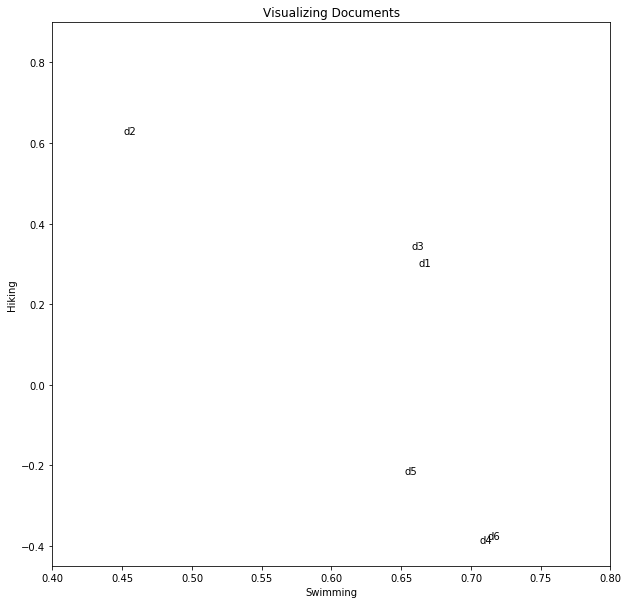

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
n=['d1','d2','d3','d4','d5','d6']
axes = plt.gca()
ax.set_title("Visualizing Documents")
ax.set_xlabel('Swimming')
ax.set_ylabel('Hiking')

axes.set_xlim([0.4,0.8])
axes.set_ylim([-0.45,0.9])
for i, txt in enumerate(n):
    ax.annotate(txt, (data[i,0], data[i,1]))